In [1]:
import pandas as pd
import sklearn as sk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Df3 = pd.read_csv('3Buckets.csv')
Df5 = pd.read_csv('5Buckets.csv')
Df8 = pd.read_csv('8Buckets.csv')
Df12 = pd.read_csv('12Buckets.csv')

In [3]:
Df12.head()

,Year,Team,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,Dead,IR,Prac,Susp,Wins,Playoff Wins,SuperBowl Win
0,2005,cardinals,8.02,3.09,2.08,9.11,1.47,8.76,0.44,15.55,5.49,6.72,0.81,3.03,8.08,0.16,0.09,0.0,5,0,0
1,2006,cardinals,9.22,0.95,2.46,11.08,3.72,11.23,0.81,20.40,3.43,6.87,10.18,1.76,1.18,0.61,0.15,0.0,5,0,0
2,2007,cardinals,8.73,1.48,3.39,11.32,1.64,10.80,0.95,10.49,5.60,8.55,7.57,1.13,2.07,13.01,0.08,0.0,8,0,0
3,2008,cardinals,8.13,2.29,9.81,8.31,3.75,11.07,1.67,11.33,13.31,7.49,7.27,0.80,4.09,0.23,0.32,0.0,9,3,0
4,2009,cardinals,10.10,8.03,10.46,6.54,7.00,14.14,0.66,9.37,8.26,12.29,4.53,2.21,6.92,5.68,0.21,0.0,10,1,0


In [6]:
## Test if normalization by year affects the analysis
labels = ['Safeties','Corners','InsideBackers','Edge','InteriorDLine','WRs','TEs','InteriorOLine','Tackles','QB','RB','Special']
Df12Normalized = Df12.copy()

def Normalize(x):
    RetList = []
    for label in labels:
        dfyear = Df12Normalized[Df12Normalized['Year'] == x['Year']]
        val = (x[label] - np.mean(dfyear[label]))/(np.std(dfyear[label]))
        
        RetList.append(val)
    
    return pd.Series(RetList)
    
    
    
Df12Normalized[labels] = Df12Normalized.apply(Normalize, axis = 1)   

In [68]:
X = Df12[['Dead','Safeties','Corners','InsideBackers','Edge','InteriorDLine','WRs','TEs','InteriorOLine','Tackles','QB','RB','Special']]
NonPredictorX = Df12[['Year','Team']]
Y = Df12[['Wins', 'Playoff Wins', 'SuperBowl Win']]

X_Norm = Df12Normalized[['Dead','Safeties','Corners','InsideBackers','Edge','InteriorDLine','WRs','TEs','InteriorOLine','Tackles','QB','RB','Special']]
NonPredictorX_Norm = Df12Normalized[['Year','Team']]
Y_Norm = Df12Normalized[['Wins', 'Playoff Wins', 'SuperBowl Win']]

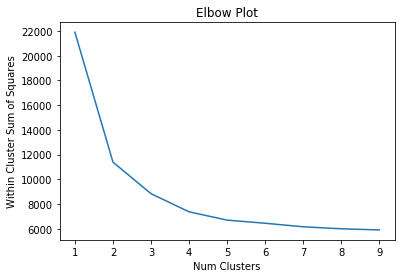

Seemingly the best number of clusters is around 10, will try between 7,10,12


In [72]:
## Elbow Plot
models = []
wcss = []
for i in range(1,10): 
    i = int(i)
    KM = KMeans(n_clusters = i, random_state = 0, init = "k-means++", n_init = 10)
    KM.fit(X_Norm)
    wcss.append(KM.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title("Elbow Plot")
plt.xlabel("Num Clusters")
plt.ylabel("Within Cluster Sum of Squares")

plt.show()
print("Seemingly the best number of clusters is around 10, will try between 7,10,12")

## 50 Clusters (Normalized)

In [73]:
## 7 clusters
KM12_50 = KMeans(n_clusters = 4, random_state = 0, init = "k-means++", n_init = 100)
KM12_50.fit(X_Norm)
Df12_50Clust = Df12Normalized.copy()
Df12_50Clust['Cluster'] = KM12_50.labels_
KM12_50.cluster_centers_

array([[ 1.40530556e+01,  6.19928170e-02, -6.64339376e-02,
        -1.69763219e-01,  4.95828525e-02, -3.46410571e-02,
         3.20139730e-01,  6.93144675e-03,  5.50838435e-02,
         3.35457971e-01,  3.85162477e-02, -3.57616664e-03,
        -7.64289424e-02],
       [ 1.45131783e+00, -4.82359956e-02, -7.67956030e-02,
        -8.41721667e-02,  4.44223724e-02, -5.57744698e-02,
        -1.67692057e-01,  3.54931805e-02, -5.48696938e-03,
        -4.97554584e-02, -9.82624710e-02, -1.61263510e-02,
        -8.87028172e-02],
       [ 7.29866197e+00,  3.69385207e-02,  1.60974879e-01,
         2.14831894e-01, -1.06870891e-01,  1.11716729e-01,
         1.43829878e-01, -7.02468769e-02,  8.71863833e-03,
        -6.70725706e-02,  1.08328009e-01,  4.29948381e-03,
         1.66387482e-01],
       [ 2.91975000e+01,  3.42016762e-01,  2.17259533e-01,
         4.29155232e-01,  1.80911376e-02,  1.27524219e-01,
        -2.61690511e-02,  3.98439748e-02, -4.73555659e-01,
        -2.23970080e-01,  8.99496294e

In [75]:
##Match Averages spending back to groupby to gain cluster averages for all metrics
Df12_50_GB = Df12_50Clust.groupby(by = "Cluster")[['SuperBowl Win', "Playoff Wins",'Wins']].mean()
Df12_50_GB.reset_index(inplace = True)
labs = X.columns
# for lab in labs:
#     Df12_50_GB[lab] = 0

for i in range (0,len(KM12_50.cluster_centers_)):
    k_m = 0
    for lab in labs:
        val = KM12_50.cluster_centers_[i][k_m]
        Df12_50_GB.set_value(i,lab,val)
        k_m+=1
        

for i in range(0,len(Df12_50_GB)):
    TC = 0
    for j in range(4,16):
        TC += Df12_50_GB.iloc[i,j]
    Df12_50_GB.set_value(i,'TotCap',TC)
    
Df12_50_GB['Count'] = Df12_50Clust.groupby(by = "Cluster")['Year'].count()

C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [76]:
Df12_50Clust

,Year,Team,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,Dead,IR,Prac,Susp,Wins,Playoff Wins,SuperBowl Win,Cluster
0,2005,cardinals,1.402731,-0.207893,-0.704751,0.637538,-0.524513,0.666781,-0.808983,3.703935,0.513275,-0.200323,-1.050627,1.269564,8.08,0.16,0.09,0.00,5,0,0,2
1,2006,cardinals,1.968584,-0.894881,-0.620196,1.020491,-0.200519,0.858693,-0.797375,4.104730,-0.310605,-0.153475,2.053163,0.192998,1.18,0.61,0.15,0.00,5,0,0,1
2,2007,cardinals,1.927200,-1.231017,-0.680460,0.750435,-0.728735,0.483166,-0.943145,1.903609,0.425250,0.211767,1.018352,-0.611292,2.07,13.01,0.08,0.00,8,0,0,1
3,2008,cardinals,1.401572,-1.141278,0.977356,-0.113338,-0.431277,0.562258,-0.953613,1.769090,2.042454,-0.268646,0.866360,-1.143908,4.09,0.23,0.32,0.00,9,3,0,1
4,2009,cardinals,1.503735,0.174713,1.021642,-0.924559,0.278701,1.189041,-1.609632,0.775470,0.265150,0.469486,-0.344347,-0.131045,6.92,5.68,0.21,0.00,10,1,0,2
5,2010,cardinals,1.613952,-0.849541,-0.258377,-1.251956,-0.664909,0.637206,-1.169800,0.807186,-0.521820,-1.905404,-0.884359,-0.166150,2.40,1.28,0.53,0.00,5,0,0,1
6,2011,cardinals,1.638575,-0.049815,1.306243,-1.006159,-0.972664,2.022461,-0.321045,0.247426,0.493089,0.330983,-0.581804,0.152630,3.87,2.13,0.07,0.00,8,0,0,1
7,2012,cardinals,0.680805,-0.490184,0.621029,-0.696469,-1.322693,1.717825,-0.244359,-0.031586,-0.564093,0.378869,-0.245968,-0.555833,8.36,15.70,0.00,0.00,5,0,0,2
8,2013,cardinals,-1.464060,-0.204676,0.178310,0.375255,-0.938489,0.688131,-0.524985,1.236881,-1.089700,-0.749279,-0.375046,0.449407,0.49,6.40,0.32,0.00,10,0,0,1
9,2014,cardinals,-1.084622,1.084897,0.011337,1.160648,-0.644063,0.305840,-0.389820,-0.988293,-1.185348,0.622452,-1.284821,-0.757899,0.24,21.29,0.47,2.25,11,0,0,1


In [100]:
ClusterDescriptions12_5

{0: 'Pays corners, inside backers, QBs more than any other cluster, pays Interior Dline, RBs less than other clusters',
 1: 'Pays almost every position the least, uses only about 57% of cap space anyways',
 2: 'Pays Safeties, WRs, QBs the most, pays Corners the least, uses about 83% of cap space',
 3: 'Pays Edge players, WRs, TEs, RBs the most, pays Inside Backers the least, uses about 92% of cap space',
 4: 'Pays Interior Dline the most BY FAR, also Interior Oline, RBs, and Special teamers the most, uses about 91% of cap space '}

In [59]:
for c in range(0,5):
    for w in range(0,17):
        print ("Wins: " + str(w) + "   " "Cluster: " + str(c))
        print (Df12_7Clust[(Df12_7Clust['Cluster'] == c)&(Df12_7Clust['Wins'] == w)]['Team'].value_counts())


,Year,Team,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,Dead,IR,Prac,Susp,Wins,Playoff Wins,SuperBowl Win,Cluster
29,2019,falcons,5.54,10.07,2.98,14.75,8.99,10.32,3.44,14.21,7.67,9.49,5.00,4.22,9.83,17.16,0.08,0.29,7,0,0,4
36,2011,ravens,9.55,10.63,8.09,16.63,7.84,10.19,2.15,12.44,3.46,4.86,4.31,3.53,3.14,6.98,0.56,0.00,12,2,0,4
37,2012,ravens,12.31,12.21,10.58,14.78,11.03,10.53,1.68,7.23,4.84,7.04,8.68,3.09,9.61,13.72,0.38,0.00,10,4,1,4
38,2013,ravens,4.88,6.69,4.00,16.66,13.04,6.54,3.20,7.83,7.43,5.95,5.22,3.02,0.02,1.78,0.31,0.00,8,0,0,4
39,2014,ravens,5.81,9.52,5.31,14.00,13.17,5.93,3.68,9.86,5.07,11.86,6.33,3.43,11.27,10.15,0.36,0.00,10,1,0,4
48,2008,bills,3.63,6.69,4.11,13.23,10.75,15.07,0.99,7.13,6.74,3.88,2.31,3.47,3.93,10.85,0.48,0.00,7,0,0,4
49,2009,bills,5.84,8.93,1.18,15.02,10.55,13.44,1.52,9.76,4.25,3.09,3.38,2.82,6.85,4.00,0.43,0.00,6,0,0,4
50,2010,bills,6.63,10.82,7.92,15.71,13.37,10.64,2.00,6.28,3.72,3.30,4.51,3.12,9.67,1.25,0.29,0.00,4,0,0,4
51,2011,bills,4.10,9.65,9.70,7.76,13.87,7.83,2.33,2.89,2.74,5.85,6.59,2.96,8.25,18.48,0.00,0.00,6,0,0,4
52,2012,bills,5.11,8.78,5.98,17.68,13.87,9.41,3.29,5.67,4.20,7.84,6.21,3.06,0.45,25.57,0.00,0.00,6,0,0,4


In [12]:
dflist = Df12_50Clust['Team'].unique().tolist()

In [18]:
DfTeamClustStats = pd.DataFrame(columns = ['Team','Cluster','Wins','Playoff Wins'])
i = 0
for t in dflist:
    for c in range(0,len(Df12_50_GB)):
        dfteam = Df12_50Clust[(Df12_50Clust['Team'] == t)&(Df12_50Clust['Cluster'] == c)]
        wins = np.mean(dfteam['Wins'])
        POWins = np.mean(dfteam['Playoff Wins'])
        DfTeamClustStats.set_value(i,"Team",t)
        DfTeamClustStats.set_value(i,"Cluster",c)
        DfTeamClustStats.set_value(i,"Count",str(len(dfteam)))
        DfTeamClustStats.set_value(i,"Wins",wins)
        DfTeamClustStats.set_value(i,"Playoff Wins", POWins)
        i += 1
        
        

C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning

In [19]:
DfTeamClustStats.sort_values(by = "Playoff Wins", ascending = False)

,Team,Cluster,Wins,Playoff Wins,Count
1159,giants,9,10,4,1
680,colts,30,12,4,1
1059,patriots,9,12,4,1
1273,eagles,23,13,4,1
120,ravens,20,10,4,1
469,broncos,19,12,4,1
750,chiefs,0,12,4,1
1054,patriots,4,12,3.5,2
1323,steelers,23,12,3.5,2
908,rams,8,13,3,1


In [28]:
Df12_50_GB

,Cluster,SuperBowl Win,Playoff Wins,Wins,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,TotCap,Count
0,0,0.200000,1.400000,9.800000,-0.102388,-1.418912,-0.116442,-0.583024,-0.170088,-0.162117,1.313730,-0.318344,1.438408,-0.764367,0.058683,0.378609,-0.446253,10
1,1,0.000000,0.461538,8.076923,-0.099910,-0.389756,-0.642253,0.486551,-0.558693,-0.740928,-0.212637,1.245785,-0.853758,0.577184,0.911012,0.006932,-0.270471,13
2,2,0.000000,0.000000,6.727273,-0.546863,1.060958,0.807879,-0.353622,-0.779115,-0.039052,-0.927694,0.199325,0.650265,-1.082848,0.646577,-0.935107,-1.299296,11
3,3,0.000000,0.545455,8.454545,0.087458,0.829270,-0.504923,0.100761,-0.089003,0.091982,-0.714448,-0.339680,-0.216153,-0.493709,-0.507224,1.192253,-0.563418,11
4,4,0.166667,1.500000,9.333333,1.789001,0.234559,0.109579,-0.335564,-0.198520,-0.255149,1.215423,-1.736163,-0.259889,-0.258471,0.787436,0.872332,1.964573,6
5,5,0.000000,0.100000,6.400000,-0.131097,-0.419511,1.415545,-0.359544,0.138942,0.736853,-0.901736,-0.663080,1.536029,-0.487655,0.286918,-0.082331,1.069334,10
6,6,0.062500,0.500000,8.187500,-0.697862,1.213417,-0.220472,1.264864,-0.297678,-0.317654,-0.561406,-0.178174,-0.420520,1.197907,-0.184082,-0.450698,0.347641,16
7,7,0.000000,0.666667,8.333333,-0.147283,0.937034,-0.316905,0.028612,0.997073,0.016426,0.413227,-0.530084,-0.001044,0.514292,0.059813,-0.078717,1.892442,12
8,8,0.000000,0.583333,7.083333,0.139343,0.849399,0.172190,-1.399656,1.791127,-0.145679,-0.357830,-0.423843,0.494839,-0.211908,-0.400155,1.592740,2.100568,12
9,9,0.117647,0.823529,8.411765,-0.375273,0.761846,-0.612047,0.101776,-0.493291,-0.173292,1.575617,-0.393298,-0.669307,0.536453,-0.877098,0.243967,-0.373948,17


In [77]:
## Calculate Average Prediction Error
nk = len(Df12_50_GB)

for i in range(0,nk):
    Df12_50Clust[i] = 0

def DistFunc(x):
    Dlist = []
    TotD = 0
    for i in range(0,nk):
        D = np.sqrt((x['Safeties']-Df12_50_GB.iat[i,4])**2+(x['Corners'] - Df12_50_GB.iat[i,5])**2 + (x['InsideBackers'] - Df12_50_GB.iat[i,6])**2
                +(x['Edge']-Df12_50_GB.iat[i,7])**2+(x['InteriorDLine']-Df12_50_GB.iat[i,8])**2+(x['WRs']-Df12_50_GB.iat[i,9])**2
                +(x['TEs']-Df12_50_GB.iat[i,10])**2+(x['InteriorOLine']-Df12_50_GB.iat[i,11])**2 +(x['Tackles']-Df12_50_GB.iat[i,12])**2
                +(x['QB']-Df12_50_GB.iat[i,13])**2 +(x['RB']-Df12_50_GB.iat[i,14])**2+(x['Special']-Df12_50_GB.iat[i,15])**2)
        Dlist.append(D)
        TotD += D

    Nlist = []
    TotN = 0
    for i in range(0,nk):
        N = 1/((Dlist[i])/TotD)
        Nlist.append(N)
        TotN += N
        
        
    Perclist = []
    for i in range (0,nk):
        Perc = Nlist[i]/TotN*100
        Perclist.append(Perc)

    return (pd.Series(Perclist))

def ExpectedWins(x):
    WinShares = 0
    for i in range(0,nk):
        WinShares += x[i]/100*Df12_50_GB.iat[i,3]
    return WinShares

def ExpectedPlayoffWins(x):
    POWinShares = 0
    for i in range(0,nk):
        POWinShares += x[i]/100*Df12_50_GB.iat[i,2]
    return POWinShares

Df12_50Clust.iloc[:,22:(22+nk)] = Df12_50Clust.apply(DistFunc, axis = 1)
Df12_50Clust['ExpWins'] = Df12_50Clust.apply(ExpectedWins, axis = 1)
Df12_50Clust['ExpPOWins'] = Df12_50Clust.apply(ExpectedPlayoffWins, axis = 1)
Df12_50Clust['Error'] = abs(Df12_50Clust['Wins'] - Df12_50Clust['ExpWins'])
Df12_50Clust['POError'] = abs(Df12_50Clust['Playoff Wins'] - Df12_50Clust['ExpPOWins'])
AvgError = sum(Df12_50Clust['Error'])/len(Df12_50Clust)
AvgPOError = sum(Df12_50Clust['POError'])/len(Df12_50Clust)

In [78]:
Df12_50_GB

,Cluster,SuperBowl Win,Playoff Wins,Wins,Dead,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,TotCap,Count
0,0,0.027778,0.347222,7.236111,14.053056,0.061993,-0.066434,-0.169763,0.049583,-0.034641,0.320140,0.006931,0.055084,0.335458,0.038516,-0.003576,-0.076429,14.646346,72
1,1,0.042636,0.577519,8.391473,1.451318,-0.048236,-0.076796,-0.084172,0.044422,-0.055774,-0.167692,0.035493,-0.005487,-0.049755,-0.098262,-0.016126,-0.088703,0.928932,258
2,2,0.007042,0.338028,7.725352,7.298662,0.036939,0.160975,0.214832,-0.106871,0.111717,0.143830,-0.070247,0.008719,-0.067073,0.108328,0.004299,0.166387,7.844110,142
3,3,0.000000,0.000000,6.000000,29.197500,0.342017,0.217260,0.429155,0.018091,0.127524,-0.026169,0.039844,-0.473556,-0.223970,0.899496,0.475944,0.595149,31.023137,8


In [55]:
Df12_50_GB.to_csv("12Buck50Group.csv", index = False)
Df12_50Clust.to_csv("Df12WithClusters.csv", index = False)